In [1]:
import math  # Provides access to mathematical functions
import numpy as np  # Used for numerical operations and array handling
import matplotlib.pyplot as plt  # Library for plotting graphs
%matplotlib inline

In [2]:
# Define a quadratic function f(x) = 3x^2 - 4x + 5
def f(x):
    return 3 * x**2 - 4 * x + 5

In [3]:
# Evaluate the function at x = 3.0
f(3.0)

20.0

In [4]:
# Creates an array of x values ranging from -5 to 5 with a step size of 0.25
xs = np.arange(-5, 5, 0.25)
# Compute the corresponding y values using the function f(x)
ys = f(xs)
# Display the computed y values
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

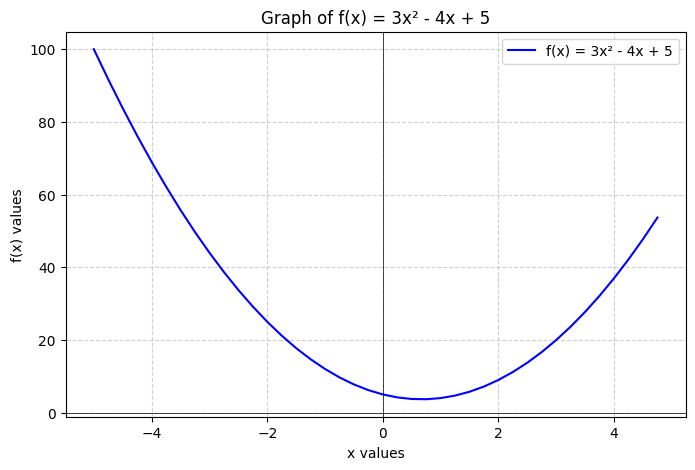

In [5]:
# Plot the function
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(xs, ys, label="f(x) = 3x² - 4x + 5", color="b")  # Plot x vs. y
plt.xlabel("x values")  # Label for x-axis
plt.ylabel("f(x) values")  # Label for y-axis
plt.title("Graph of f(x) = 3x² - 4x + 5")  # Title of the plot
plt.axhline(0, color="black", linewidth=0.5)  # Add horizontal axis
plt.axvline(0, color="black", linewidth=0.5)  # Add vertical axis
plt.grid(True, linestyle="--", alpha=0.6)  # Add a grid for better readability
plt.legend()  # Show legend
plt.show()  # Display the plot

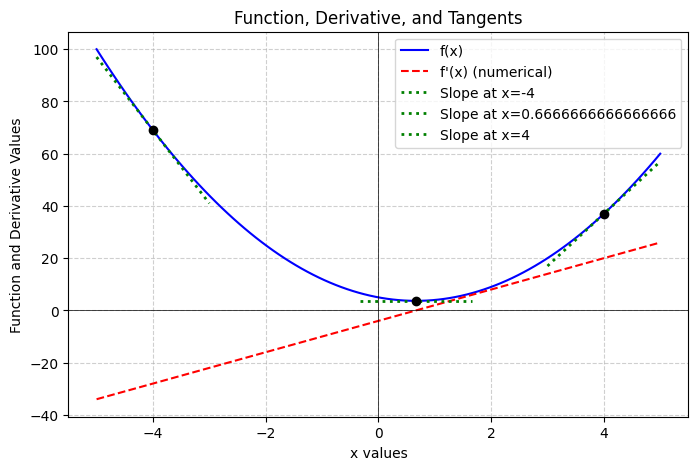

In [6]:
# Compute numerical derivative using finite differences
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)  # Central difference approximation

# Create an array of x values
xs = np.linspace(-5, 5, 100)  # Smooth range for better visualization
ys = f(xs)  # Compute function values


# Compute numerical derivative values
dys = np.array([numerical_derivative(f, x) for x in xs])

# Select specific points where we want to visualize the tangent lines
x_tangent_points = [-4, 2/3, 4]  # Points where we visualize slope
tangent_lines = []

for x0 in x_tangent_points:
    slope = numerical_derivative(f, x0)  # Compute derivative at x0
    y0 = f(x0)  # Compute function value at x0
    tangent_xs = np.linspace(x0 - 1, x0 + 1, 10)  # Small range around x0
    tangent_ys = y0 + slope * (tangent_xs - x0)  # Equation of the tangent line
    tangent_lines.append((tangent_xs, tangent_ys, x0, y0))

# Plot function and derivative
plt.figure(figsize=(8, 5))
plt.plot(xs, ys, label="f(x)", color="b")  # Function plot
plt.plot(
    xs, dys, label="f'(x) (numerical)", color="r", linestyle="--"
)  # Numerical derivative

# Plot tangent lines
for tangent_xs, tangent_ys, x0, y0 in tangent_lines:
    plt.plot(
        tangent_xs,
        tangent_ys,
        color="g",
        linestyle="dotted",
        linewidth=2,
        label=f"Slope at x={x0}",
    )
    plt.scatter(x0, y0, color="black", marker="o", zorder=3)  # Mark the tangent points

# Add labels, title, and grid
plt.xlabel("x values")
plt.ylabel("Function and Derivative Values")
plt.title("Function, Derivative, and Tangents")
plt.axhline(0, color="black", linewidth=0.5)  # Horizontal axis
plt.axvline(0, color="black", linewidth=0.5)  # Vertical axis
plt.grid(True, linestyle="--", alpha=0.6)  # Grid for readability
plt.legend()  # Show legend
plt.show()  # Display the plot

In [7]:
def get_slope_at_x(x):
    """
    Returns the numerical derivative (slope) of f(x) at a given x value.
    """
    return numerical_derivative(f, x)

x_value = 4  # Change this to test different x values
slope = get_slope_at_x(x_value)
print(f"The slope at x = {x_value} is {slope:.4f}")

The slope at x = 4 is 20.0000


In [8]:
# What This Shows:

# ✅ Basic Computation in a Neural Network:
# 	•	This is similar to how a neuron computes an output using weights and biases.
# 	•	A real neuron applies an activation function afterward (e.g., ReLU, sigmoid).

# ✅ Gradient-Based Learning (Gradient Descent):
# 	•	In training, we compute gradients (derivatives) of this operation with respect to  a, b, c .
# 	•	This helps in adjusting weights to minimize loss.

# Working with scalers for simplicity, but the underlying principle is applicable to tensors.

# Initialize variables (these could represent weights and biases in a neural network)
a = 2.0  # Example input
b = -3.0  # Example weight
c = 10.0  # Example bias term

# Compute a simple operation for our expression graph (similar to a neuron’s computation in a forward pass)
d = a * b + c  # This mimics the weighted sum: (input[a] * weight[b]) + bias[c]

# Print the result
print(d)  # Output of the computation (could represent a neuron's activation before applying a non-linearity)

# We're heading towards backpropagation 🚀

4.0


In [9]:
# Small step size for numerical differentiation
h = 0.00001  # This is the small change in the input values used to approximate the derivative

a = 2.0
b = -3.0
c = 10.0

# Function to compute the derivative using central difference
def numerical_derivative(f, vars, h=0.00001):
    """
    Computes the numerical derivative of a function 'f' with respect to each variable in 'vars'
    using central difference method.
    """
    derivatives = []
    for i, var in enumerate(vars):
        # Create a small perturbation to the variable
        vars_plus_h = vars.copy()
        vars_minus_h = vars.copy()
        vars_plus_h[i] += h
        vars_minus_h[i] -= h

        # Compute the central difference approximation for the derivative
        derivative = (f(*vars_plus_h) - f(*vars_minus_h)) / (2 * h)
        derivatives.append(derivative)
    return derivatives


# Function to compute 'd' given inputs (a, b, c)
def compute_d(a, b, c):
    return a * b + c  # The simple equation d = a * b + c


# Compute the derivative of d with respect to a, b, and c
derivatives = numerical_derivative(compute_d, [a, b, c], h)

# Print the derivatives
print(f"Derivative of d with respect to a: {derivatives[0]}")
print(f"Derivative of d with respect to b: {derivatives[1]}")
print(f"Derivative of d with respect to c: {derivatives[2]}")

Derivative of d with respect to a: -3.000000000064062
Derivative of d with respect to b: 2.0000000000131024
Derivative of d with respect to c: 0.9999999999621422


In [79]:
class Value:

    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data  # Takes in a scalar value that it
        self.grad = 0.0 # Grad resembles the derivative of the Loss function with respect to the parameters(weights) of the graphical expression.
        self._backward = lambda: None  # Function to compute gradients
        self._prev = set(_children)  # Children values in the computation graph
        self._op = _op  # The operation that produced this value
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value(t, (self,  ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad  # Derivative: 1 - tanh(n)^2
        out._backward = _backward
        return out

    def backward(self):
        # Topological sort to compute gradients
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for parent in v._prev:
                    build_topo(parent)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0  # Initialize gradient of the output to 1
        for v in reversed(topo):
            v._backward()


a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label="f")
L = d * f; L.label= "L"
L

Value(data=-8.0)

In [80]:
from graphviz import Digraph
import os

# Explicitly set the Graphviz executable path
os.environ["PATH"] += ":/opt/homebrew/Cellar/graphviz/12.2.1/bin"

def trace(root):
    nodes, edges = set(), set()  # Initialize both nodes and edges sets

    def build(v):
        if v not in nodes:  # If the node hasn't been added yet
            nodes.add(v)  # Add the node to the set
            for child in v._prev:  # Traverse the children
                edges.add((child, v))  # Create an edge from parent to child
                build(child)  # Recursively build the graph for the children
    build(root)  # Start from the root node
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)  # Get the nodes and edges from the trace
    # Add nodes to the graph
    for n in nodes:
        uid = str(id(n))
        # Visualize values within the expression graph, denoting each node within the expression graph.
        dot.node(
            name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label ,n.data ,n.grad), shape="record"
        )  # Add nodes with their data value

        # Add operation nodes if _op exists
        if hasattr(n, "_op") and n._op:  # Check if _op exists and is not None
            dot.node(name=uid + n._op, label=n._op)
            # Connect this node to it
            dot.edge(uid + n._op, uid)

    # Use _op for n2 instead of op
    for n1, n2 in edges:
        if hasattr(n2, "_op"):  # Ensure that n2 has _op before using it
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# Computational Graph Explanation  

The code defines a **computational graph** for a mathematical expression using a custom `Value` class.  
Each `Value` instance represents a scalar value in the computation, with attributes to track:  

- **`data`**: The numerical value.  
- **`_op`**: The operation that produced this value.  
- **`_prev`**: The set of values that contributed to this value (its dependencies).  

## Forward Pass Construction  

The mathematical expression is built step by step:  

1. Three initial values are created: `a`, `b`, and `c`.  
2. The multiplication operation `a * b` produces `e`.  
3. The addition operation `e + c` results in `d`.  
4. Another value `f` is introduced.  
5. The final multiplication `d * f` computes the output `L`.  

## Tracing the Computation  

- The `trace` function recursively traverses the computation graph starting from `L`.  
- It collects all **nodes** (values) and **edges** (operations) to reconstruct the computation history.  



## Visualization  

- The `draw_dot` function uses **Graphviz** to generate a visualization.  
- This illustrates how values interact through operations to produce the final result.  

# Motivation for Implementing Backpropagation in the Computational Graph  

## Introduction  

In the context of neural network optimization, **backpropagation** is a fundamental algorithm for computing gradients efficiently. Given a scalar output \( L \) that depends on multiple intermediate and input values, obtaining the derivatives of these values with respect to \( L \) is essential for updating model parameters during training.  

## Need for Backpropagation  

In our computational graph, each node represents a scalar value resulting from mathematical operations, with **leaf nodes** corresponding to input values that are typically the learnable parameters (weights) of a neural network. To optimize these parameters, we require their gradients with respect to the loss function. These gradients dictate the direction and magnitude of weight updates during training.  

Manually computing derivatives for complex functions involving multiple nested operations is intractable. Instead, by applying **automatic differentiation** through backpropagation, we can efficiently compute the gradients of all intermediate and leaf nodes via the **chain rule** of calculus.  

## The Role of Backpropagation  

Backpropagation enables the following key objectives:  

1. **Gradient Computation**:  
   - Computes the **partial derivative** of the output \( L \) with respect to each node in the graph.  
   - Uses the **chain rule** to propagate gradients from the output node backward through the computational graph.  

2. **Optimization of Neural Network Parameters**:  
   - The leaf nodes often represent the **weights** of a neural network.  
   - Once gradients are obtained, they can be used in optimization algorithms such as **Stochastic Gradient Descent (SGD), Adam, or RMSprop** to iteratively update parameters and minimize the loss function.  

3. **Computational Efficiency**:  
   - Leveraging **computational graphs** and **automatic differentiation** significantly reduces the redundancy present in naive differentiation approaches.  
   - The **reverse-mode differentiation** approach used in backpropagation ensures efficient gradient computation even for high-dimensional parameter spaces.  

## Conclusion  

Implementing backpropagation in our computational graph is critical for enabling gradient-based optimization in neural networks. By systematically propagating gradients backward from the final output, we obtain the necessary derivatives to update parameters and improve model performance. This lays the foundation for training Alfred's Legal Language Model efficiently.  

In [81]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0)


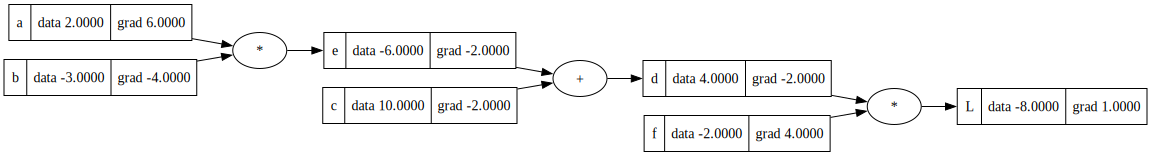

In [82]:
draw_dot(L)

In [83]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


In [84]:
# dL/dc = ? === ?
# (f(x + h) - f(x)) / h

# We're faced with an issue. How do we find the derivative of L with respect to C -> THROUGH d,
# given that we've already determined the derivative of L with respect to d.

# WELL

# First, find the derivative of d with respect to c, i.e. dd/dc

d = c + e

# dd/dc = 1
# Using the finite difference approximation:
# (d(c + h) - d(c)) / h
# ((c + h + e) - (c + e)) / h
# (c + h + e - c - e) / h
# h / h
# 1

# We have L as a function of d, and d as a function of c:
# L(d) and d = c + e

# Using the chain rule: as we need to chain the derivatives from c to L, through d. L depends on d, which depends on c
# dL/dc = dL/dd * dd/dc

dL_dd = -2

# From our previous step, we found:
dd_dc = 1  # since d = c + e

# Symmetrically

dd_de = 1

# So, the derivative simplifies to:
dL_dc = dL_dd * dd_dc  # which is just dL_dd

dL_de = dL_dd * dd_de

print(dL_dc)

-2


In [85]:
L = d * f

# dL/dd =? === f
# (f(x + h)-f(x))/h
# ((d + h)*f - d*f)/h
# (d*f + h*f - d*f)/h
# (h*f)/h
# f

# therefore the derivative of L with respect to d, is f === -2

# symmetrically, dL/df =? === d

# therefore the derivative of L with respect to f, is d === 4


In [86]:
def lol():
    # Define a small step value for numerical differentiation
    h = 0.0001

    # Create the first set of values and operations to compute L1
    a = Value(2.0, label="a")  # Value of a
    b = Value(-3.0, label="b")  # Value of b
    c = Value(10.0, label="c")  # Value of c
    e = a * b  # Multiply a and b to get e
    e.label = "e"  # Label the result as "e"
    d = e + c  # Add e and c to get d
    d.label = "d"  # Label the result as "d"
    f = Value(-2.0, label="f")  # Value of f
    L = d * f  # Multiply d and f to get L (the loss function)
    L.label = "L"  # Label the result as "L"
    L1 = L.data  # Store the loss value L in L1

    # Create the second set of values with a small change in a (for numerical differentiation)
    a = Value(2.0 + h, label="a")  # Slightly perturb the value of a by h
    b = Value(-3.0, label="b")  # Keep b the same as before
    c = Value(10.0, label="c")  # Keep c the same as before
    e = a * b  # Multiply the new a and b to get e
    e.label = "e"  # Label the result as "e"
    d = e + c  # Add the new e and c to get d
    d.label = "d"  # Label the result as "d"
    f = Value(-2.0, label="f")  # Keep f the same as before
    L = d * f  # Multiply the new d and f to get L (the new loss function)
    L.label = "L"  # Label the result as "L"
    L2 = L.data  # Store the new loss value L in L2

    # Compute the numerical derivative of L with respect to a using the finite difference method
    print((L2 - L1) / h)  # Approximate the derivative of L with respect to a

lol()

6.000000000021544


Backpropagation is just a recursive application of chain rule, backwards through the expression graph.

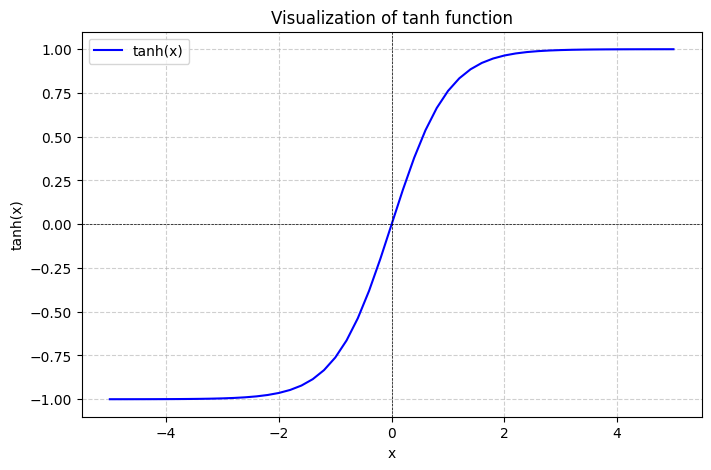

In [87]:
# Define the range and step size
x = np.arange(-5, 5.2, 0.2)
y = np.tanh(x)  # Compute tanh values

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="tanh(x)", color="blue")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.title("Visualization of tanh function")
plt.legend()
plt.show()

# Visualization of the Hyperbolic Tangent (tanh) Function

## Description
This script visualizes the hyperbolic tangent (tanh) function, which is commonly used in neural networks as an activation function. The tanh function maps input values to the range (-1, 1), which helps normalize data and keep it centered around zero. This property makes it particularly useful in deep learning as it can improve convergence during training by mitigating vanishing gradient problems.

## Why it's useful for backpropagation

This maintains relatively large values for inputs around zero. This helps gradients remain significant, unlike the sigmoid function, which can lead to vanishing gradients for large positive or negative inputs. By keeping gradients within a reasonable range, tanh helps facilitate efficient weight updates during backpropagation, making it a preferred choice over sigmoid in many neural network architectures.



In [91]:
# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

X1w1x2w2 = x1w1 + x2w2; X1w1x2w2.label = 'x1w1 + x2w2' 

n = X1w1x2w2 + b;
n.label = "n"

# output

o =  n.tanh();
o.label = "o"

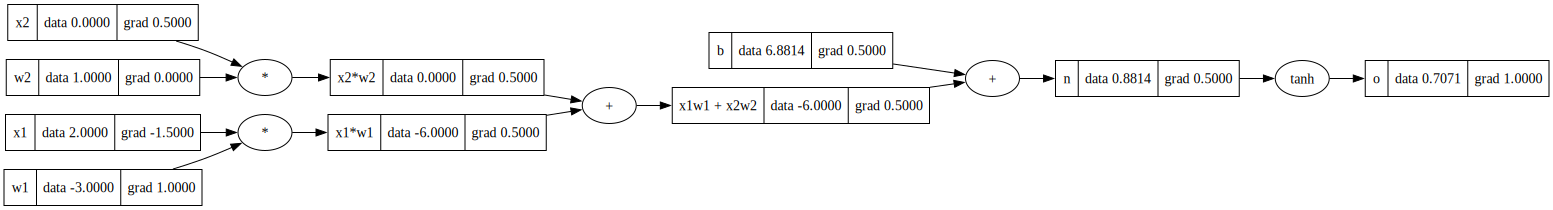

In [94]:
draw_dot(o)

In [93]:
o.backward()